In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
383  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
384  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
385  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
386  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
387  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

In [3]:
#빈데이터 많은 Chol, BUN 삭제
psqi_df=df[['Sample_ID','GROUP','COHORT','AGE','SEX','BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1','Creatinine_1','AST_1','ALT_1','TG_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','HDL_1',
          'BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','TG_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','HDL_2']]

In [3]:
#빈데이터 많은 Chol, BUN 추가
psqi_df=df[['Sample_ID','GROUP','COHORT','AGE','SEX',
            'BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1',
            'Creatinine_1','AST_1','ALT_1','TG_1','LDL_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1','HDL_1','BUN_1','Chol_1',
          'BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','TG_2','LDL_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2','HDL_2','BUN_2','Chol_2']]

In [4]:
psqi_df

,Sample_ID,GROUP,COHORT,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
0,S0001,SMI,2,60,M,21.110190,8.0,7.7,0.2,3.91,...,9.7,15.9,0.89,108.0,78.0,87.0,83.0,77.0,13.1,NaN
1,S0002,SMI,2,61,M,27.782064,4.0,5.4,0.2,5.51,...,19.9,27.9,0.99,138.0,92.0,73.0,90.5,59.0,19.2,NaN
2,S0003,SMI,2,52,F,24.944742,3.0,5.1,0.7,4.85,...,22.6,36.7,0.89,127.0,80.0,66.0,86.5,40.0,17.1,NaN
3,S0004,SMI,2,41,F,22.620489,6.0,4.2,0.6,6.14,...,16.0,30.9,0.82,119.0,83.0,77.0,77.0,54.0,12.2,NaN
4,S0005,SMI,2,41,F,20.524157,10.0,3.2,0.1,4.93,...,14.9,26.8,0.80,110.0,68.0,67.0,66.5,72.0,16.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,24,F,34.803410,5.0,11.3,0.4,5.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,44,F,30.903615,3.0,10.6,2.3,5.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,37,F,28.676533,3.0,12.2,1,6.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,51,M,24.549738,5.0,10.4,1.2,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
psqi_df = psqi_df[(psqi_df['COHORT'] != 3)]
psqi_df

,Sample_ID,GROUP,COHORT,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
0,S0001,SMI,2,60,M,21.110190,8.0,7.7,0.2,3.91,...,9.7,15.9,0.89,108.0,78.0,87.0,83.0,77.0,13.1,NaN
1,S0002,SMI,2,61,M,27.782064,4.0,5.4,0.2,5.51,...,19.9,27.9,0.99,138.0,92.0,73.0,90.5,59.0,19.2,NaN
2,S0003,SMI,2,52,F,24.944742,3.0,5.1,0.7,4.85,...,22.6,36.7,0.89,127.0,80.0,66.0,86.5,40.0,17.1,NaN
3,S0004,SMI,2,41,F,22.620489,6.0,4.2,0.6,6.14,...,16.0,30.9,0.82,119.0,83.0,77.0,77.0,54.0,12.2,NaN
4,S0005,SMI,2,41,F,20.524157,10.0,3.2,0.1,4.93,...,14.9,26.8,0.80,110.0,68.0,67.0,66.5,72.0,16.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,24,F,34.803410,5.0,11.3,0.4,5.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,44,F,30.903615,3.0,10.6,2.3,5.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,37,F,28.676533,3.0,12.2,1,6.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,51,M,24.549738,5.0,10.4,1.2,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
psqi_df=psqi_df.dropna()
psqi_df.reset_index(drop=True, inplace=True)
psqi_df=psqi_df.drop(["Sample_ID", "GROUP", "COHORT"],axis=1)
#1분, 매일다름, 정해진간이없음 삭제

In [7]:
psqi_df["SEX"] = psqi_df["SEX"].apply(lambda x: 1. if x=='M' else 0.)

In [8]:
psqi_df["Insulin _1"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["Insulin _2"] = psqi_df["Insulin _2"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [9]:
psqi_df["CRP_1"] = psqi_df["CRP_1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["CRP_2"] = psqi_df["CRP_2"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

In [10]:
psqi_df.describe()

,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,Neutrophil_1,Lym_1,GLU0_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.00000,180.000000,180.000000
mean,38.366667,0.305556,23.799644,5.105556,7.700000,0.748889,5.844867,56.086111,34.113333,98.90000,...,19.053333,28.888333,0.862444,114.605556,72.477778,75.644444,81.328889,59.20000,12.984444,190.922222
std,11.589776,0.461927,4.936177,2.893833,4.105985,1.344157,1.412280,8.502880,7.708889,14.43773,...,6.616151,7.098802,0.071696,13.213544,9.091991,10.306814,10.251265,14.01372,3.508550,32.017358
min,20.000000,0.000000,15.231576,0.000000,0.100000,0.000000,2.820000,34.500000,15.100000,63.00000,...,7.700000,11.500000,0.700000,91.000000,57.000000,54.000000,61.000000,29.00000,6.000000,109.000000
25%,29.000000,0.000000,20.833309,3.000000,5.000000,0.200000,4.857500,50.525000,28.975000,92.00000,...,14.200000,24.275000,0.820000,104.000000,67.000000,68.000000,73.875000,49.00000,10.675000,167.750000
50%,35.500000,0.000000,23.422889,5.000000,6.500000,0.300000,5.720000,55.950000,34.000000,95.50000,...,17.950000,28.450000,0.850000,114.000000,71.000000,75.000000,80.500000,57.00000,12.700000,188.000000
75%,46.000000,1.000000,25.502662,7.000000,9.505000,0.700000,6.580000,62.000000,39.000000,102.00000,...,22.125000,33.450000,0.900000,123.000000,77.250000,82.000000,89.000000,69.00000,14.600000,211.000000
max,63.000000,1.000000,67.500000,14.000000,24.700000,11.100000,10.550000,78.400000,55.400000,182.00000,...,46.100000,48.300000,1.070000,158.000000,107.000000,112.000000,118.000000,116.00000,36.400000,296.000000


In [11]:
psqi_df["SEX"].value_counts()

0.0    125
1.0     55
Name: SEX, dtype: int64

In [12]:
psqi_df

,AGE,SEX,BMI_1,PSQI_TOTAL_1,Insulin _1,CRP_1,WBC_1,Neutrophil_1,Lym_1,GLU0_1,...,Fat_2_x,FatPercentage_2,WHR_2,SBP_2,DBP_2,HR_2,Waist_2,HDL_2,BUN_2,Chol_2
0,35,1.0,24.097789,5.0,5.57,0.0,5.82,54.6,35.0,89,...,20.4,26.8,1.00,131.0,74.0,66.0,88.5,53.0,17.5,180.0
1,46,1.0,23.472213,5.0,7.35,0.7,5.46,44.3,43.7,90,...,14.5,18.6,0.84,126.0,87.0,108.0,85.0,64.0,14.4,203.0
2,32,1.0,23.744827,2.0,9.26,0.4,3.99,51.0,37.8,96,...,17.8,25.6,0.89,131.0,77.0,87.0,81.0,49.0,14.1,196.0
3,33,0.0,20.616175,4.0,3.52,0.0,5.84,39.1,42.1,81,...,12.8,21.9,0.78,102.0,62.0,70.0,69.0,98.0,10.5,224.0
4,28,0.0,18.437500,3.0,2.86,0.0,4.22,49.3,39.3,63,...,12.3,25.6,0.80,106.0,72.0,69.0,61.0,71.0,11.3,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,63,0.0,26.259585,3.0,4.20,0.2,4.78,42.3,47.3,96,...,27.3,39.3,0.94,134.0,89.0,81.0,98.0,66.0,17.1,141.0
176,57,1.0,28.630719,4.0,8.80,3.0,4.60,51.7,34.6,94,...,22.1,25.7,0.95,113.0,76.0,66.0,97.5,51.0,14.6,134.0
177,35,0.0,21.641274,1.0,6.30,0.4,6.34,55.9,34.9,87,...,17.5,29.9,0.84,107.0,72.0,64.0,80.5,49.0,9.7,147.0
178,61,0.0,20.421366,8.0,4.80,0.2,4.88,40.9,48.0,93,...,15.3,29.0,0.81,106.0,76.0,92.0,79.0,60.0,10.2,134.0


In [13]:
#x 배열 생성 (x=쓸 수 있는 모든 특징)
X1=psqi_df[['AGE','SEX','BMI_1','PSQI_TOTAL_1','Insulin _1','CRP_1','WBC_1','Neutrophil_1','Lym_1','GLU0_1',
            'Creatinine_1','AST_1','ALT_1','HDL_1','TG_1','Muscle_1','Fat_1_x','FatPercentage _1','WHR_1','SBP_1',
            'DBP_1','HR_1','Waist_1']].values

X2=psqi_df[['AGE','SEX','BMI_2','PSQI_TOTAL_2','Insulin _2','CRP_2','WBC_2','Neutrophil_2','Lym_2','GLU0_2',
            'Creatinine_2','AST_2','ALT_2','HDL_2','TG_2','Muscle_2','Fat_2_x','FatPercentage_2','WHR_2','SBP_2',
            'DBP_2','HR_2','Waist_2']].values
X=np.concatenate((X1, X2), axis=0)


#y 배열 생성 (y=LDL)
Y1= psqi_df[['LDL_1']].values
Y2= psqi_df[['LDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

In [14]:
len(X), len(Y)

(360, 360)

In [15]:
X.shape, Y.shape

((360, 23), (360, 1))

# 정규화

In [16]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [17]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [18]:
len(x_train), len(x_test)

(288, 72)

In [19]:
X.shape, Y.shape

((360, 23), (360, 1))

In [20]:
dim=X.shape[1]
dim

23

# MLP

In [28]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=1000, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/1000
72/72 - 0s - loss: 12279.2227 - mse: 12279.2227
Epoch 2/1000
72/72 - 0s - loss: 10407.7344 - mse: 10407.7344
Epoch 3/1000
72/72 - 0s - loss: 7342.1562 - mse: 7342.1562
Epoch 4/1000
72/72 - 0s - loss: 4036.4714 - mse: 4036.4714
Epoch 5/1000
72/72 - 0s - loss: 1858.0112 - mse: 1858.0112
Epoch 6/1000
72/72 - 0s - loss: 1292.1658 - mse: 1292.1658
Epoch 7/1000
72/72 - 0s - loss: 1161.1307 - mse: 1161.1307
Epoch 8/1000
72/72 - 0s - loss: 1070.9340 - mse: 1070.9340
Epoch 9/1000
72/72 - 0s - loss: 1005.5892 - mse: 1005.5892
Epoch 10/1000
72/72 - 0s - loss: 958.0283 - mse: 958.0283
Epoch 11/1000
72/72 - 0s - loss: 916.0247 - mse: 916.0247
Epoch 12/1000
72/72 - 0s - loss: 884.9627 - mse: 884.9627
Epoch 13/1000
72/72 - 0s - loss: 854.7992 - mse: 854.7992
Epoch 14/1000
72/72 - 0s - loss: 836.4276 - mse: 836.4276
Epoch 15/1000
72/72 - 0s - loss: 809.3678 - mse: 809.3678
Epoch 16/1000
72/72 - 0s - loss: 790.6620 - mse: 790.6620
Epoch 17/1000
72/72 - 0s - loss: 772.9847 - mse: 772.9847
E

[29793.34375, 29793.34375]

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                768       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,857
Trainable params: 1,857
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

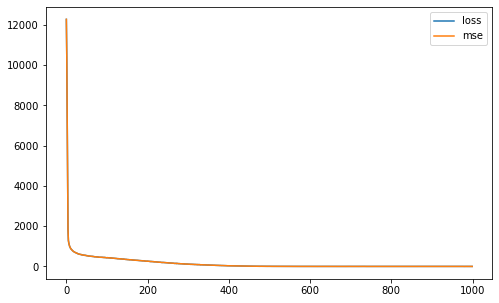

In [30]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [31]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [32]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [33]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 28.12 %
test set prediction accuracy: 27.78 %


In [34]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()

### <오차범위 3>
- train set prediction accuracy(+-3): 96.53 % <br>
- test set prediction accuracy(+-3): 11.11 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 98.96 % <br>
- test set prediction accuracy(+-5): 13.89 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 100.00 % <br>
- test set prediction accuracy(+-10): 22.22 % <br>
<br>



In [35]:
#x 배열 생성 (시본으로 선별한 특징)
X1=psqi_df[['SEX','AGE','PSQI_TOTAL_1','BMI_1','WBC_1','Insulin _1','Neutrophil_1','HDL_1','GLU0_1',
            'Muscle_1','FatPercentage _1','SBP_1','DBP_1','HR_1','Waist_1']].values

X2=psqi_df[['SEX','AGE','PSQI_TOTAL_2','BMI_2','WBC_2','Insulin _2','Neutrophil_2','HDL_2','GLU0_2',
            'Muscle_2','FatPercentage_2','SBP_2','DBP_2','HR_2','Waist_2']].values

X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=LDL)
Y1= psqi_df[['LDL_1']].values
Y2= psqi_df[['LDL_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

# 정규화

In [30]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [31]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [32]:
len(x_train), len(x_test)

(288, 72)

In [33]:
X.shape, Y.shape

((360, 15), (360, 1))

In [34]:
dim=X.shape[1]
dim

15

# MLP

In [35]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
72/72 - 1s - loss: 14851.0625 - mse: 14851.0625
Epoch 2/150
72/72 - 0s - loss: 14373.9219 - mse: 14373.9219
Epoch 3/150
72/72 - 0s - loss: 13366.1816 - mse: 13366.1816
Epoch 4/150
72/72 - 0s - loss: 11835.8730 - mse: 11835.8730
Epoch 5/150
72/72 - 0s - loss: 9569.8633 - mse: 9569.8633
Epoch 6/150
72/72 - 0s - loss: 7183.9243 - mse: 7183.9243
Epoch 7/150
72/72 - 0s - loss: 5075.7915 - mse: 5075.7915
Epoch 8/150
72/72 - 0s - loss: 4061.9722 - mse: 4061.9722
Epoch 9/150
72/72 - 0s - loss: 3631.3821 - mse: 3631.3821
Epoch 10/150
72/72 - 0s - loss: 3468.8340 - mse: 3468.8340
Epoch 11/150
72/72 - 0s - loss: 3373.6628 - mse: 3373.6628
Epoch 12/150
72/72 - 0s - loss: 3276.3738 - mse: 3276.3738
Epoch 13/150
72/72 - 0s - loss: 3229.0830 - mse: 3229.0830
Epoch 14/150
72/72 - 0s - loss: 3168.7351 - mse: 3168.7351
Epoch 15/150
72/72 - 0s - loss: 3119.7937 - mse: 3119.7937
Epoch 16/150
72/72 - 0s - loss: 3086.7119 - mse: 3086.7119
Epoch 17/150
72/72 - 0s - loss: 3021.8777 - mse: 3021.877

[9658.2314453125, 9658.2314453125]

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

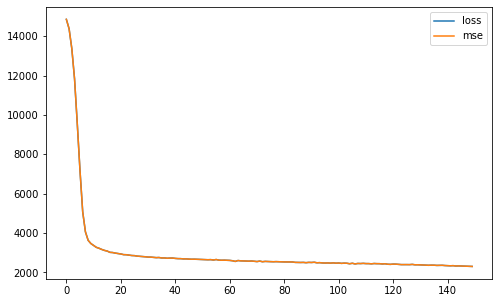

In [37]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [38]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [39]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [40]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 11.46 %
test set prediction accuracy: 8.33 %


In [41]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 20 설정
print('### <오차범위 20>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도

### <오차범위 3>
- train set prediction accuracy(+-3): 7.64 % <br>
- test set prediction accuracy(+-3): 6.94 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 13.19 % <br>
- test set prediction accuracy(+-5): 9.72 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 25.35 % <br>
- test set prediction accuracy(+-10): 25.00 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 48.96 % <br>
- test set prediction accuracy(+-20): 54.17 % <br>


In [42]:
#x 배열 생성 (피검사 안하고 할 수 있는 수치)
X1=psqi_df[['SEX','AGE','PSQI_TOTAL_1','BMI_1',
            'Muscle_1','FatPercentage _1','SBP_1','DBP_1','HR_1','Waist_1']].values

X2=psqi_df[['SEX','AGE','PSQI_TOTAL_2','BMI_2',
            'Muscle_2','FatPercentage_2','SBP_2','DBP_2','HR_2','Waist_2']].values
X=np.concatenate((X1, X2), axis=0)


#y 배열 생성 (y=TG)
Y1= psqi_df[['TG_1']].values
Y2= psqi_df[['TG_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

# 정규화

In [43]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

In [44]:
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8, random_state=100)

In [45]:
len(x_train), len(x_test)

(288, 72)

In [46]:
X.shape, Y.shape

((360, 10), (360, 1))

In [47]:
dim=X.shape[1]
dim

10

# MLP

In [48]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=dim))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=150, batch_size=4, verbose=2)
model.evaluate(x_test, y_test) 

Epoch 1/150
72/72 - 1s - loss: 14555.7432 - mse: 14555.7432
Epoch 2/150
72/72 - 0s - loss: 13647.1133 - mse: 13647.1133
Epoch 3/150
72/72 - 0s - loss: 12046.6699 - mse: 12046.6699
Epoch 4/150
72/72 - 0s - loss: 9738.7324 - mse: 9738.7324
Epoch 5/150
72/72 - 0s - loss: 7297.1816 - mse: 7297.1816
Epoch 6/150
72/72 - 0s - loss: 5274.3525 - mse: 5274.3525
Epoch 7/150
72/72 - 0s - loss: 4257.6792 - mse: 4257.6792
Epoch 8/150
72/72 - 0s - loss: 3866.3499 - mse: 3866.3499
Epoch 9/150
72/72 - 0s - loss: 3755.8481 - mse: 3755.8481
Epoch 10/150
72/72 - 0s - loss: 3695.7512 - mse: 3695.7512
Epoch 11/150
72/72 - 0s - loss: 3646.7622 - mse: 3646.7622
Epoch 12/150
72/72 - 0s - loss: 3616.5178 - mse: 3616.5178
Epoch 13/150
72/72 - 0s - loss: 3589.9465 - mse: 3589.9465
Epoch 14/150
72/72 - 0s - loss: 3549.6084 - mse: 3549.6084
Epoch 15/150
72/72 - 0s - loss: 3539.3721 - mse: 3539.3721
Epoch 16/150
72/72 - 0s - loss: 3513.3745 - mse: 3513.3745
Epoch 17/150
72/72 - 0s - loss: 3497.9146 - mse: 3497.9146


[10358.779296875, 10358.779296875]

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

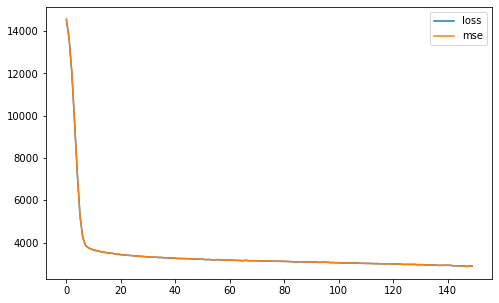

In [50]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [51]:
y_train_p = model.predict(x_train)
y_test_p = model.predict(x_test)

In [52]:
y_train_list=np.array(y_train).flatten().tolist() #y_train 리스트
y_test_list=np.array(y_test).flatten().tolist() #y_test 리스트
y_p_train_list=np.array(y_train_p).flatten().tolist() #y_train 예측 리스트
y_p_test_list=np.array(y_test_p).flatten().tolist() #y_test 예측 리스트

In [53]:
#평균 성능 테스트
scores = 0
mean=np.mean(Y, axis=0)
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= mean <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= mean <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 11.46 %
test set prediction accuracy: 8.33 %


In [54]:
######입력용#######

#오차 범위 3 설정
print('### <오차범위 3>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-3 <= y_p_train_list[i] <= y_train_list[i]+3:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-3 <= y_p_test_list[i] <= y_test_list[i]+3:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-3): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 5 설정
print('### <오차범위 5>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-5 <= y_p_train_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_test_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-5): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 10 설정
print('### <오차범위 10>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-10 <= y_p_train_list[i] <= y_train_list[i]+10:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-10 <= y_p_test_list[i] <= y_test_list[i]+10:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-10): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도
print('<br>')
print()
#======================================================================================


#오차 범위 20 설정
print('### <오차범위 20>')
scores = 0
for i in range(len(y_train)):
    if  y_train_list[i]-20 <= y_p_train_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_train)
print("- train set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도


scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_test_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("- test set prediction accuracy(+-20): {:.2f} % <br>".format(accuracy*100)) # 예측 정확도

### <오차범위 3>
- train set prediction accuracy(+-3): 6.25 % <br>
- test set prediction accuracy(+-3): 8.33 % <br>
<br>

### <오차범위 5>
- train set prediction accuracy(+-5): 11.81 % <br>
- test set prediction accuracy(+-5): 15.28 % <br>
<br>

### <오차범위 10>
- train set prediction accuracy(+-10): 23.96 % <br>
- test set prediction accuracy(+-10): 29.17 % <br>
<br>

### <오차범위 20>
- train set prediction accuracy(+-20): 45.49 % <br>
- test set prediction accuracy(+-20): 45.83 % <br>


# 다쓴거
### <오차범위 3>
- train_all set prediction accuracy(+-3): 88.89 % <br>
- test_all set prediction accuracy(+-3): 31.94 % <br>
<br>

### <오차범위 5>
- train_all set prediction accuracy(+-5): 96.53 % <br>
- test_all set prediction accuracy(+-5): 55.56 % <br>
<br>

### <오차범위 10>
- train_all set prediction accuracy(+-10): 100.00 % <br>
- test_all set prediction accuracy(+-10): 83.33 % <br>
<br>

# 다안쓴거
### <오차범위 3>
- train_some set prediction accuracy(+-3): 32.99 % <br>
- test_some set prediction accuracy(+-3): 27.78 % <br>
<br>

### <오차범위 5>
- train_some set prediction accuracy(+-5): 54.86 % <br>
- test_some set prediction accuracy(+-5): 40.28 % <br>
<br>

### <오차범위 10>
- train_some set prediction accuracy(+-10): 82.29 % <br>
- test_some set prediction accuracy(+-10): 59.72 % <br>
<br>